In [180]:
import pandas as pd
import numpy as np
import matplotlib as plt
from scipy import stats
import seaborn as sns
import pylab
from statsmodels.stats.proportion import proportions_ztest

In [68]:
insurance=pd.read_csv('insurance.csv')

In [69]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Analisa Deskriptif Statistik

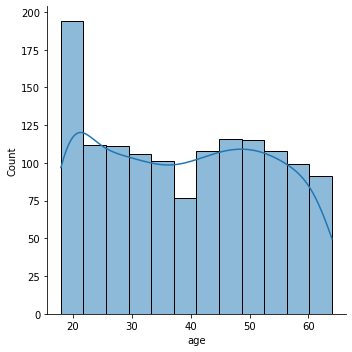

In [83]:
#Melihat PMF dari umur
pmf_age=sns.displot(data=insurance,x='age',kde=True)
pmf_age

In [71]:
#1.Rata-rata Umur Nasabah Asuransi 
age_proba=insurance['age'].value_counts(normalize=True).sort_index().to_numpy()
age_value=insurance['age'].sort_values().unique()

expect_age=age_proba*age_value
average_age=round(expect_age.sum(),1)
print(f"Umur rata rata dari nasabah adalah {average_age} tahun")

Umur rata rata dari nasabah adalah 39.2 tahun


BMI rata rata dari nasabah yang merupakan perokok adalah 30.7


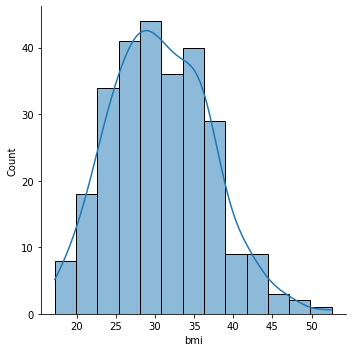

In [72]:
#2.Rata-rata nilai BMI dari Nasabah yang merokok
smoker_bmi_proba = insurance[insurance['smoker']=='yes']['bmi'].value_counts(normalize=True).sort_index().to_numpy()
smoker_bmi_value=insurance[insurance['smoker']=='yes']['bmi'].sort_values().unique()

expect_smoker_bmi=smoker_bmi_proba*smoker_bmi_value
average_smoker_bmi=round(expect_smoker_bmi.sum(),1)
print(f"BMI rata rata dari nasabah yang merupakan perokok adalah {average_smoker_bmi}")
sns.displot(data=insurance.query("smoker =='yes'"),x='bmi',kde=True)

-Variansi charge pada pengguna yang merokok adalah 133207311.21
-Variansi charge pada pengguna yang tidak merokok adalah 35925420.5
-Variansi charge pada pengguna yang merokok lebih besar dibanding dengan pengguna yang 
tidak merokok


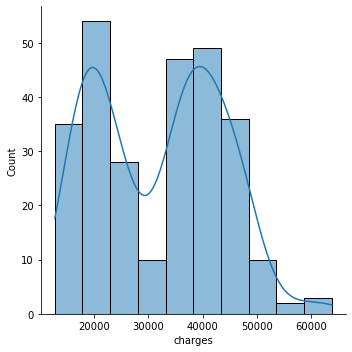

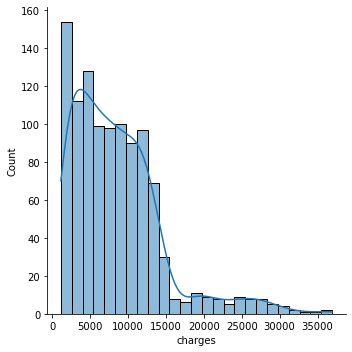

In [182]:
#3.Apakah variansi dari Tagihan Perokok dan Non Perokok sama?

#Mencari variansi charge pada pengguna yang merokok
smoker_charge_variance = round(insurance.query("smoker =='yes'")['charges'].var(),2)
print(f"-Variansi charge pada pengguna yang merokok adalah {smoker_charge_variance}")
sns.displot(data=insurance.query("smoker =='yes'"),x='charges',kde=True)

#Mencari variansi charge pada pengguna yang tidak merokok
nonsmoker_charge_variance = round(insurance.query("smoker =='no'")['charges'].var(),2)
print(f"-Variansi charge pada pengguna yang tidak merokok adalah {nonsmoker_charge_variance}")
sns.displot(data=insurance.query("smoker =='no'"),x='charges',kde=True)


print('-Variansi charge pada pengguna yang merokok lebih besar dibanding dengan pengguna yang \ntidak merokok')

In [74]:
print('- Apabila melihat distribusinya, charge dari pengguna yang merokok adalah bimodal, dan \ncharge dari yang tidak merokok adalah unimodal')
print('- Kemungkinan ada dua group yang membagi charge perokok')

- Apabila melihat distribusinya, charge dari pengguna yang merokok adalah bimodal, dan 
charge dari yang tidak merokok adalah unimodal
- Kemungkinan ada dua group yang membagi charge perokok


-Umur rata rata dari perokok yang wanita adalah 38.61 tahun


/var/folders/0p/j5xcwc5n2932chbb87l5pyym0000gn/T/ipykernel_1760/3161221260.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_smoker_age_average =round(insurance[insurance["smoker"]=="yes"][insurance["sex"]=="female"]["age"].mean(),2)
/var/folders/0p/j5xcwc5n2932chbb87l5pyym0000gn/T/ipykernel_1760/3161221260.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.displot(data=insurance[insurance["smoker"]=="yes"][insurance["sex"]=="female"],x='age',kde=True)
/var/folders/0p/j5xcwc5n2932chbb87l5pyym0000gn/T/ipykernel_1760/3161221260.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_smoker_age_average =round(insurance[insurance["smoker"]=="yes"][insurance["sex"]=="male"]["age"].mean(),2)
/var/folders/0p/j5xcwc5n2932chbb87l5pyym0000gn/T/ipykernel_1760/3161221260.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.displot(data=insurance[insuran

-Umur rata rata dari perokok yang pria adalah 38.45 tahun
-Umur rata rata dari perokok wanita sedikit lebih tinggi dibanding perokok pria 


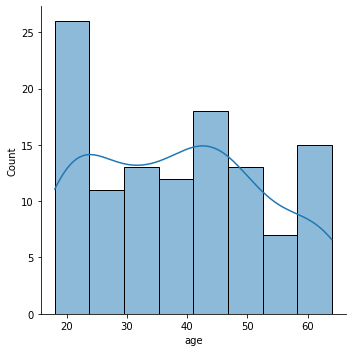

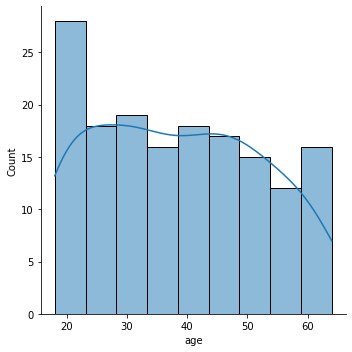

In [34]:
#4.Apakah rata rata umur perempuan dan laki-laki yang merokok sama?

#mencari rata-rata umur pengguna yang berjenis kelamin wanita dan merupakan perokok
female_smoker_age_average =round(insurance[insurance["smoker"]=="yes"][insurance["sex"]=="female"]["age"].mean(),2)
print(f"-Umur rata rata dari perokok yang wanita adalah {female_smoker_age_average} tahun")
sns.displot(data=insurance[insurance["smoker"]=="yes"][insurance["sex"]=="female"],x='age',kde=True)

#mencari rata-rata umur pengguna yang berjenis kelamin laki-laki dan merupakan perokok
male_smoker_age_average =round(insurance[insurance["smoker"]=="yes"][insurance["sex"]=="male"]["age"].mean(),2)
print(f"-Umur rata rata dari perokok yang pria adalah {male_smoker_age_average} tahun")
sns.displot(data=insurance[insurance["smoker"]=="yes"][insurance["sex"]=="male"],x='age',kde=True)

print('-Umur rata rata dari perokok wanita sedikit lebih tinggi dibanding perokok pria ')

In [35]:
#5.Mana yang lebih tinggi, rata rata tagihan kesehatan perokok atau non merokok?

#Mencari rata rata charge pada pengguna yang merokok
smoker_charge_mean = insurance.query("smoker =='yes'")['charges'].mean()
print(smoker_charge_mean)

#Mencari rata rata charge pada pengguna yang tidak merokok
nonsmoker_charge_mean = insurance.query("smoker =='no'")['charges'].mean()
print(nonsmoker_charge_mean)

"Rata rata charge pada pengguna yang merokok lebih besar dibanding dengan pengguna yang tidak merokok"

32050.23183153285
8434.268297856199


'Rata rata charge pada pengguna yang merokok lebih besar dibanding dengan pengguna yang tidak merokok'

35116.90965694065
8633.955125479397


/var/folders/0p/j5xcwc5n2932chbb87l5pyym0000gn/T/ipykernel_1760/251854138.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  big_smoker_charge_mean = insurance[insurance["smoker"]=="yes"][insurance["bmi"]>=25]["charges"].mean()
/var/folders/0p/j5xcwc5n2932chbb87l5pyym0000gn/T/ipykernel_1760/251854138.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.displot(data=insurance[insurance["smoker"]=="yes"][insurance["bmi"]>=25],x='charges')
/var/folders/0p/j5xcwc5n2932chbb87l5pyym0000gn/T/ipykernel_1760/251854138.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  big_non_moker_charge_mean = insurance[insurance["smoker"]=="no"][insurance["bmi"]>=np.float64(25)]["charges"].mean()
/var/folders/0p/j5xcwc5n2932chbb87l5pyym0000gn/T/ipykernel_1760/251854138.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.displot(data=insurance[insurance["smoker"]=="no"][in

'Rata-rata charge pada pengguna yang merokok dan BMI >= 25 lebih tinggi  dibanding pada pengguna yang tidak merokok dan BMI >= 25'

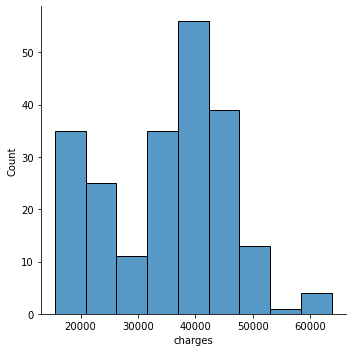

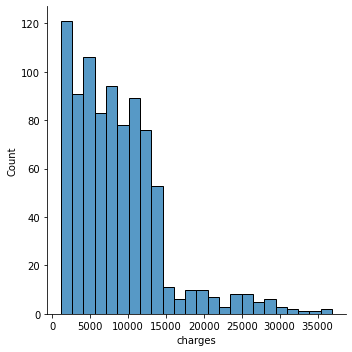

In [36]:
#6. Mana yang lebih tinggi, rata rata tagihan kesehatan perokok yang BMI nya diatas 25 atau non perokok yang BMI nya diatas 25

#Mencari rata-rata charge pada pengguna yang merokok dan BMI >= 25
big_smoker_charge_mean = insurance[insurance["smoker"]=="yes"][insurance["bmi"]>=25]["charges"].mean()
print(big_smoker_charge_mean)
sns.displot(data=insurance[insurance["smoker"]=="yes"][insurance["bmi"]>=25],x='charges')


#Mencari rata-rata charge pada pengguna yang tidak merokok dan BMI >= 25
big_non_moker_charge_mean = insurance[insurance["smoker"]=="no"][insurance["bmi"]>=np.float64(25)]["charges"].mean()
print(big_non_moker_charge_mean)
sns.displot(data=insurance[insurance["smoker"]=="no"][insurance["bmi"]>=np.float64(25)],x='charges')

"Rata-rata charge pada pengguna yang merokok dan BMI >= 25 lebih tinggi \
 dibanding pada pengguna yang tidak merokok dan BMI >= 25"

Secara distribusi keduanya unimodal
BMI rata rata dari nasabah pria adalah 30.94
BMI rata rata dari nasabah wanita adalah 30.38
BMI pria sedikit lebih tinggi dibanding wanita


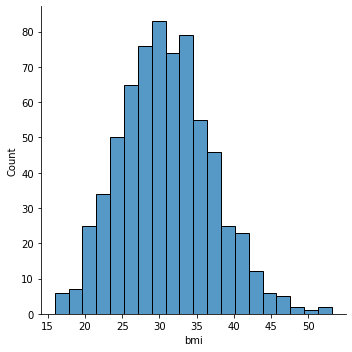

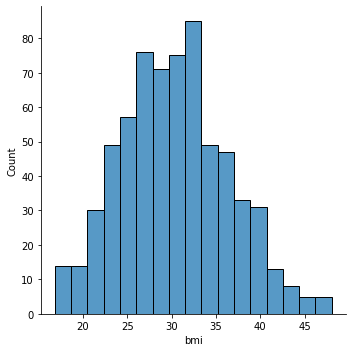

In [37]:
#7.BMI mana yang lebih tinggi, seseorang laki-laki atau perempuan?
#Melihat distribusi dari BMI pengguna pria
sns.displot(data=insurance[insurance["sex"]=="male"],x='bmi')

#Melihat distribusi dari BMI pengguna pria
sns.displot(data=insurance[insurance["sex"]=="female"],x='bmi')

print('Secara distribusi keduanya unimodal')

#Menghitung rata rata bmi pria 
bmi_male_proba=insurance[insurance["sex"]=="male"]['bmi'].value_counts(normalize=True).sort_index().to_numpy()
bmi_male_value=insurance[insurance["sex"]=="male"]['bmi'].sort_values().unique()
expect_bmi_male=bmi_male_proba*bmi_male_value
average_bmi_male=round(expect_bmi_male.sum(),2)
print(f"BMI rata rata dari nasabah pria adalah {average_bmi_male}")

#Menghitung rata rata bmi wanita 
bmi_female_proba=insurance[insurance["sex"]=="female"]['bmi'].value_counts(normalize=True).sort_index().to_numpy()
bmi_female_value=insurance[insurance["sex"]=="female"]['bmi'].sort_values().unique()
expect_bmi_female=bmi_female_proba*bmi_female_value
average_bmi_female=round(expect_bmi_female.sum(),2)
print(f"BMI rata rata dari nasabah wanita adalah {average_bmi_female}")
print(f"BMI pria sedikit lebih tinggi dibanding wanita")



Secara distribusi keduanya unimodal
BMI rata rata dari nasabah perokok adalah 30.71
BMI rata rata dari nasabah non-perokok adalah 30.65
BMI perokok relatif sama dengan nonperokok


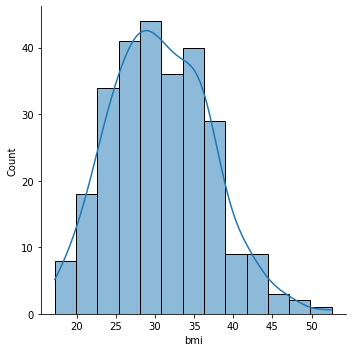

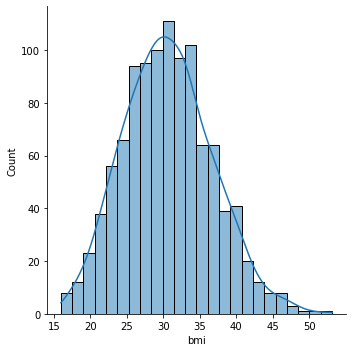

In [38]:
#8.BMI mana yang lebih tinggi, seseorang perokok atau non perokok?
#Melihat distribusi BMI dari perokok
sns.displot(data=insurance[insurance["smoker"]=="yes"],x='bmi',kde=True)


#Melihat distribusi BMI dari non-perokok
sns.displot(data=insurance[insurance["smoker"]=="no"],x='bmi',kde=True)

print('Secara distribusi keduanya unimodal')

#Menghitung rata rata bmi perokok
bmi_smoker_proba = insurance[insurance["smoker"]=="yes"]['bmi'].value_counts(normalize=True).sort_index().to_numpy()
bmi_smoker_value = insurance[insurance["smoker"]=="yes"]['bmi'].sort_values().unique()
expect_bmi_smoker=bmi_smoker_proba*bmi_smoker_value
average_bmi_smoker=round(expect_bmi_smoker.sum(),2)
print(f"BMI rata rata dari nasabah perokok adalah {average_bmi_smoker}")

#Menghitung rata rata bmi non-perokok
bmi_nonsmoker_proba = insurance[insurance["smoker"]=="no"]['bmi'].value_counts(normalize=True).sort_index().to_numpy()
bmi_nonsmoker_value = insurance[insurance["smoker"]=="no"]['bmi'].sort_values().unique()
expect_bmi_nonsmoker=bmi_nonsmoker_proba*bmi_nonsmoker_value
average_bmi_nonsmoker=round(expect_bmi_nonsmoker.sum(),2)
print(f"BMI rata rata dari nasabah non-perokok adalah {average_bmi_nonsmoker}")

print(f"BMI perokok relatif sama dengan nonperokok")

# Analisa Variabel Kategorik

In [165]:
#Gender mana yang punya tagihan paling tinggi
#Menghitung expected value tagihan pria
charge_male_proba = insurance[insurance["sex"]=="male"]
['charges'].value_counts(normalize=True).sort_index().to_numpy()
charge_male_value = insurance[insurance["sex"]=="male"]
['charges'].sort_values().unique()
expect_charge_male=charge_male_proba*charge_male_value
average_charge_male=round(expect_charge_male.sum(),2)
print(f"Charges rata rata dari nasabah pria adalah {average_charge_male}")

#Menghitung expected value tagihan wanita
charge_female_proba = insurance[insurance["sex"]=="female"]
['charges'].value_counts(normalize=True).sort_index().to_numpy()
charge_female_value = insurance[insurance["sex"]=="female"]
['charges'].sort_values().unique()
expect_charge_female=charge_female_proba*charge_female_value
average_charge_female=round(expect_charge_female.sum(),2)
print(f"Charges rata rata dari nasabah wanita adalah {average_charge_female}")

print('Gender pria punya tagihan lebih besar dibanding gender wanita')

Charges rata rata dari nasabah pria adalah 13956.75
Charges rata rata dari nasabah wanita adalah 12569.58
Gender pria punya tagihan lebih besar dibanding gender wanita


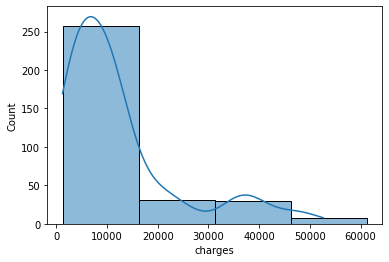

In [39]:
#Distribusi proporsi tagihan di region southwest
southwest=sns.histplot(
    data=insurance[insurance['region']=='southwest']
    ['charges'],binwidth=15000,kde=True)

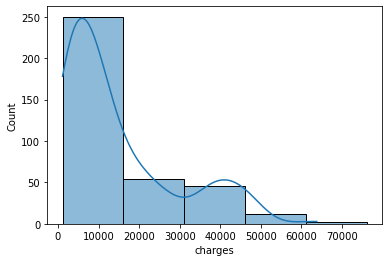

In [40]:
#Distribusi proporsi tagihan di region southeast
southeast=sns.histplot(
    data=insurance[insurance['region']=='southeast']
    ['charges'],binwidth=15000,kde=True)

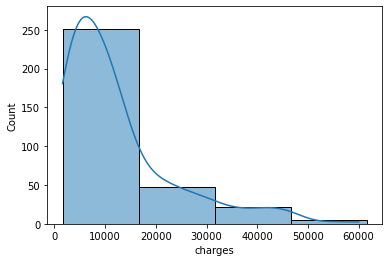

In [41]:
#Distribusi proporsi tagihan di region northwest
northwest=sns.histplot(
    data=insurance[insurance['region']=='northwest']
    ['charges'],binwidth=15000,kde=True)

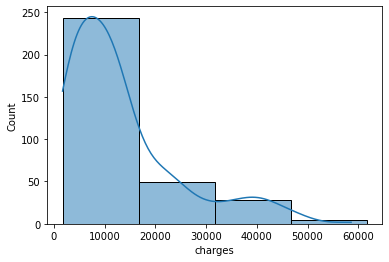

In [42]:
#Distribusi proporsi tagihan di region northeast
northeast=sns.histplot(
    data=insurance[insurance['region']=='northeast']
    ['charges'],binwidth=15000,kde=True)

<AxesSubplot:ylabel='region'>

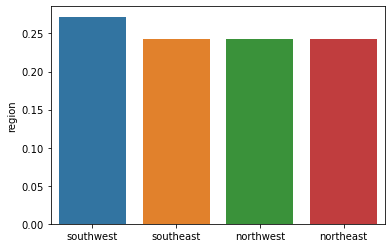

In [178]:
#Proporsi data pada masing masing region
sns.barplot(
    data=insurance, x=insurance['region'].unique(),
    y=insurance['region'].value_counts()/insurance.shape[:1])

Proporsi data pada tiap-tiap region berbeda. Region southwest memilki proporsi data paling tinggi.

<AxesSubplot:ylabel='smoker'>

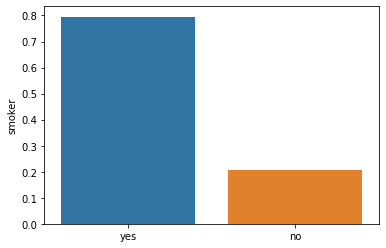

In [44]:
#Proporsi perokok dan non perokok
sns.barplot(data=insurance, x=insurance['smoker'].unique(), y=insurance['smoker'].value_counts()/insurance.shape[:1])

Proporsi perokok lebih tinggi dibanding non-perokok

In [45]:
#Mencari probability jenis kelamin pada nasabah yang merokok
probability_sex_given_smoker=insurance[insurance['smoker']=='yes']
['sex'].value_counts(normalize=True)
probability_sex_given_smoker

male      0.580292
female    0.419708
Name: sex, dtype: float64

Probability nasabah perokok adalah seorang wanita adalah 0.419708 dan probability nasabah perokok adalah pria adalah  0.580292

# Analisa Variabel Kontinu

In [170]:
#Mencari probability nasabah BMI di atas 25 mendapatkan tagihan kesehatan diatas 16.7
bmi_above_25=len(insurance[insurance['bmi']>=25])
bmi_above_25_charges_above_16K=len(
    insurance[insurance['bmi']>=25][insurance['charges']>=16700])
prob_charges_above_16K_given_bmi_above_25=bmi_above_25_charges_above_16K/bmi_above_25
print(f"Seseorang dengan BMI di atas 25 mendapatkan tagihan\
 kesehatan di atas 16.7 adalah {prob_charges_above_16K_given_bmi_above_25}")

Seseorang dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.7 adalah 0.25892040256175664


/var/folders/0p/j5xcwc5n2932chbb87l5pyym0000gn/T/ipykernel_1760/3291482752.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  insurance[insurance['bmi']>=25][insurance['charges']>=16700])


In [171]:
#Mencari probability nasabah BMI di bawah 25 mendapatkan tagihan kesehatan diatas 16.7
bmi_below_25=len(insurance[insurance['bmi']<25])
bmi_below_25_charges_above_16K=len(
    insurance[insurance['bmi']<25][insurance['charges']>=16700])
prob_charges_above_16K_given_bmi_below_25=bmi_below_25_charges_above_16K/bmi_below_25
print(f"Seseorang dengan BMI di bawah 25 mendapatkan tagihan\
 kesehatan di atas 16.7 adalah {prob_charges_above_16K_given_bmi_below_25}")

Seseorang dengan BMI di bawah 25 mendapatkan tagihan kesehatan di atas 16.7 adalah 0.20816326530612245


/var/folders/0p/j5xcwc5n2932chbb87l5pyym0000gn/T/ipykernel_1760/261375387.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  insurance[insurance['bmi']<25][insurance['charges']>=16700])


Seseorang dengan BMI diatas 25 lebih mungkin mendapatkan tagihan di atas 16.7K

In [175]:
smoker_bmi_above_25=len(
    insurance[insurance['smoker']=='yes'][insurance['bmi']>=25])
smoker_bmi_above_25_charges_16=len(
    insurance[insurance['smoker']=='yes']
    [insurance['bmi']>=25][insurance['charges']>=16700])
p_chr_abv_16_gvn_smoker_bmi_above_25=smoker_bmi_above_25_charges_16/smoker_bmi_above_25
print(f"Seseorang perokok dengan BMI di atas \
 25 mendapatkan tagihan kesehatan diatas 16.7 K \
 adalah {p_chr_abv_16_gvn_smoker_bmi_above_25}")

Seseorang perokok dengan BMI di atas  25 mendapatkan tagihan kesehatan diatas 16.7 K  adalah 0.9817351598173516


/var/folders/0p/j5xcwc5n2932chbb87l5pyym0000gn/T/ipykernel_1760/1182600059.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  insurance[insurance['smoker']=='yes'][insurance['bmi']>=25])
/var/folders/0p/j5xcwc5n2932chbb87l5pyym0000gn/T/ipykernel_1760/1182600059.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  insurance[insurance['smoker']=='yes']


In [177]:
nsmoker_bmi_abv_25=len(
    insurance[insurance['smoker']=='no'][insurance['bmi']>=25])
nsmoker_bmi_abv_25_chrg_16=len(
    insurance[insurance['smoker']=='no']
    [insurance['bmi']>=25][insurance['charges']>=16700])
p_chrg_abv_16_gvn_nonsmoker_bmi_abv_25=nsmoker_bmi_abv_25_chrg_16/nsmoker_bmi_abv_25
print(f"Seseorang non-perokok dengan BMI di atas 25 mendapatkan\
 tagihan kesehatan diatas 16.7 K adalah\
 {proba_charges_above_16_given_nonsmoker_bmi_above_25}")

Seseorang non-perokok dengan BMI di atas 25 mendapatkan tagihan kesehatan diatas 16.7 K adalah 0.07780320366132723


/var/folders/0p/j5xcwc5n2932chbb87l5pyym0000gn/T/ipykernel_1760/1433785009.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  insurance[insurance['smoker']=='no'][insurance['bmi']>=25])
/var/folders/0p/j5xcwc5n2932chbb87l5pyym0000gn/T/ipykernel_1760/1433785009.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  insurance[insurance['smoker']=='no']


Seseorang perokok dengan BMI di atas 25 lebih mungkin mendapatkan tagihan di atas 16.7K dibanding seorang non-perokok dengan BMI di atas 25 

# Analisa Korelasi Variabel

Korelasi antara umur dan tagihan pada nasabah yang bukan perokok

- Korelasi antara umur dan tagihan pada nasabah yang bukan perokok adalah adalah 0.6279467837664198
- Umur punya hubungan positif yang cukup kuat terhadap tagihan pada nasabah yang bukan perokok


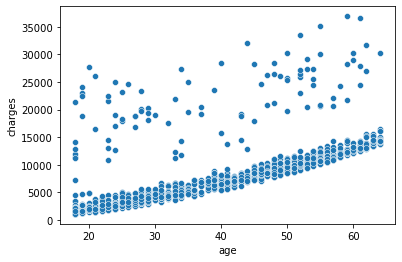

In [50]:
#mencari korelasi antara umur dan tagihan pada nasabah yang bukan perokok
corr_age_charge_given_nosmoker=insurance[insurance['smoker']=='no']['age'].corr(insurance['charges'])
sns.scatterplot(data=insurance,x=insurance[insurance['smoker']=='no']['age'],y=insurance['charges'])
print(f"- Korelasi antara umur dan tagihan pada nasabah yang bukan perokok adalah adalah {corr_age_charge_given_nosmoker}")
print("- Umur punya hubungan positif yang cukup kuat terhadap tagihan pada nasabah yang bukan perokok")

Korelasi antara BMI dan tagihan pada nasabah yang bukan perokok

- Korelasi antara bmi dan tagihan pada nasabah yang bukan perokok adalah adalah 0.08403654312833271
- BMI punya hubungan positif yang sangat lemah terhadap tagihan pada nasabah yang bukan perokok


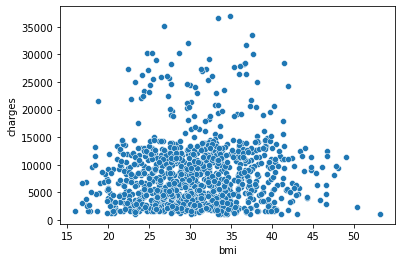

In [51]:
#Mencari korelasi antara BMI dan tagihan pada nasabah yang bukan perokok
corr_bmi_charge_given_nosmoker=insurance[insurance['smoker']=='no']['bmi'].corr(insurance['charges'])
sns.scatterplot(data=insurance,x=insurance[insurance['smoker']=='no']['bmi'],y=insurance['charges'])
print(f"- Korelasi antara bmi dan tagihan pada nasabah yang bukan perokok adalah adalah {corr_bmi_charge_given_nosmoker}")
print("- BMI punya hubungan positif yang sangat lemah terhadap tagihan pada nasabah yang bukan perokok")

Korelasi antara BMI dan tagihan pada nasabah yang perokok

- Korelasi antara bmi dan tagihan pada nasabah yang bukan perokok adalah adalah 0.8064806070155405
- BMI punya hubungan positif yang sangat kuat terhadap tagihan pada nasabah yang merupakan perokok


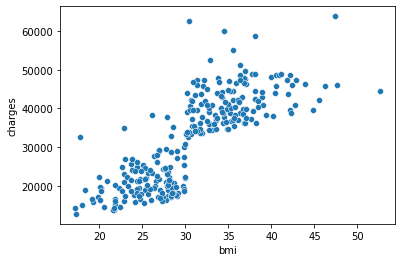

In [52]:
#Mencari korelasi antara BMI dan tagihan pada nasabah yang merupakan perokok
corr_bmi_charge_given_smoker=insurance[insurance['smoker']=='yes']['bmi'].corr(insurance['charges'])
sns.scatterplot(data=insurance,x=insurance[insurance['smoker']=='yes']['bmi'],y=insurance['charges'])
print(f"- Korelasi antara bmi dan tagihan pada nasabah yang bukan perokok adalah adalah {corr_bmi_charge_given_smoker}")
print("- BMI punya hubungan positif yang sangat kuat terhadap tagihan pada nasabah yang merupakan perokok")

Korelasi antara umur dan tagihan pada nasabah yang perokok

- Korelasi antara umur dan tagihan pada nasabah yang bukan perokok adalah adalah 0.36822444373077773
- Umur punya hubungan positif yang lemah terhadap tagihan pada nasabah yang merupakan perokok


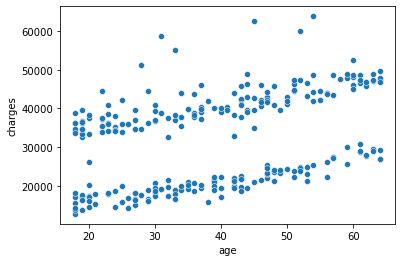

In [53]:
#mencari korelasi antara umur dan tagihan pada nasabah yang merupakan perokok
corr_age_charge_given_smoker=insurance[insurance['smoker']=='yes']['age'].corr(insurance['charges'])
sns.scatterplot(data=insurance,x=insurance[insurance['smoker']=='yes']['age'],y=insurance['charges'])
print(f"- Korelasi antara umur dan tagihan pada nasabah yang bukan perokok adalah adalah {corr_age_charge_given_smoker}")
print("- Umur punya hubungan positif yang lemah terhadap tagihan pada nasabah yang merupakan perokok")

# Pengujian Hipotesis

## 1. Apakah Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok?

In [150]:
#Inisiasi data yang akan diuji
smoker_charge=insurance[insurance['smoker']=='yes']['charges']
nonsmoker_charge=insurance[insurance['smoker']=='no']['charges']

### Mendefinisikan H0 dan H1 
H0 = print ("H0 = smoker_charge_mean <= non_smoker_charge_mean") <br>
H1 = print ("H1 = smoker_charge_mean > non_smoker_charge_mean")


### Menentukan statistik uji
Statistik yang diuji terkait rata-rata. Standart deviasi populasi dari kedua data tersebut tidak diketahui, sehingga digunakan t-test pada dua sampel



### Aturan keputusan
alpha = 0.05 <br>
Uji pihak kanan (H1 > H0) <br>

In [151]:
#Memanggil library uji-t 2 sampel
from scipy.stats import ttest_ind

In [152]:
#Melakukan uji-t 2 sampel
stat, pvalue = ttest_ind(
    a=smoker_charge, b=nonsmoker_charge,equal_var=False,alternative='greater')

#Intepretasi hasil
print('Statistics = %.4f, pvalue=%.4f' %(stat,pvalue))

Statistics = 32.7519, pvalue=0.0000


### Kesimpulan 
H0 berhasil ditolak, sehingga dapat disimpulkan tagihan kesehatan perokok lebih besar dibanding tagihan kesehatan non-perokok

## 2. Apakah Proporsi perokok laki laki lebih besar dari perempuan

In [153]:
#Inisiasi data yang akan diuji
smoker = insurance[insurance['smoker']=='yes']
male_smoker = insurance[insurance['smoker']=='yes'][insurance['sex']=='male']
female_smoker = insurance[insurance['smoker']=='yes'][insurance['sex']=='female']
prop_male_smoker = len(male_smoker)/len(smoker)
prop_female_smoker = len(female_smoker)/len(smoker)
number_of_success = np.array([len(male_smoker),len(female_smoker)])
total_sample_sizes = np.array([len(smoker),len(smoker)])

/var/folders/0p/j5xcwc5n2932chbb87l5pyym0000gn/T/ipykernel_1760/1794370323.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_smoker = insurance[insurance['smoker']=='yes'][insurance['sex']=='male']
/var/folders/0p/j5xcwc5n2932chbb87l5pyym0000gn/T/ipykernel_1760/1794370323.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_smoker = insurance[insurance['smoker']=='yes'][insurance['sex']=='female']


### Mendefinisikan H0 dan H1 
H0 = prop_male_smoker <= prop_female_smoker <br>
H1 = prop_male_smoker > prop_female_smoker

### Menentukan statistik uji
Statistik yang diuji terkait proporsi. Uji yang digunakan adalah z-test untuk 2 group.


### Menentukan Aturan Keputusan
Alpha = 0.05 <br>
Uji pihak kanan (H0<H1)

## Melakukan Uji statistik

In [166]:
test_statZ, pvalueZ = proportions_ztest(
    number_of_success,total_sample_sizes,alternative='larger')
print('Test statistiknya adalah %.4f' %(test_statZ))
print('P valuenya adalah %.4f ' %(pvalueZ))

Test statistiknya adalah 3.7592
P valuenya adalah 0.0001 


### Kesimpulan
H0 berhasil ditolak sehingga dapat disimpulkan bahwa proporsi perokok pria lebih besar dibanding perokok wanita

## 3. Apakah Tagihan kesehatan laki-laki lebih besar dari perempuan


In [155]:
#Inisiasi data yang akan diuji
male_charge=insurance[insurance['sex']=='male']['charges']
female_charge=insurance[insurance['sex']=='female']['charges']

In [156]:
#Check variance
male_var=male_charge.var()
female_var= female_charge.var()
print('Variance tagihan pria adalah %.4f, sedangkan variance tagihan wanita adalah : %.4f' %(male_var,female_var))
male_mean=male_charge.mean()
female_mean=female_charge.mean()
print('Mean tagihan pria adalah %.4f, sedangkan mean tagihan wanita adalah : %.4f' %(male_mean,female_mean))

Variance tagihan pria adalah 168247513.2882, sedangkan variance tagihan wanita adalah : 123848048.2885
Mean tagihan pria adalah 13956.7512, sedangkan mean tagihan wanita adalah : 12569.5788


### Mendefinisikan H0 dan H1 
H0 = print ("H0 = male_charge_mean <= female_charge_mean") <br>
H1 = print ("H1 = male_charge_mean > female_charge_mean")

### Menentukan statistik uji
Statistik yang diuji terkait rata-rata. Standart deviasi populasi dari kedua data tersebut tidak diketahui, sehingga digunakan t-test pada dua sampel



### Aturan keputusan
alpha = 0.05 <br>
Uji pihak kanan (H1 > H0) <br>

In [157]:
#Melakukan uji-t 2 sampel
stat_male_female, pvalue_male_female = ttest_ind(
    a=male_charge, b=female_charge,equal_var=False,alternative='greater')

#Intepretasi hasil
print('Statistics = %.4f, pvalue=%.4f' %(stat_male_female,pvalue_male_female))

Statistics = 2.1009, pvalue=0.0179


### Kesimpulan
H0 berhasil ditolak sehingga dapat disimpulkan bahwa tagihan pria lebih besar dibanding tagihan wanita